<img src="https://media-exp1.licdn.com/dms/image/C4E1BAQEKOIsF4fUeLg/company-background_10000/0?e=2159024400&v=beta&t=URpnngW1v84s3H7co4-iXZ2OsbUZUcdY8pVemsQZ-3g"/>

# Data Set Information
**This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.**

# Attribute Information:

- Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

# Task
**We Can Build a Model for Prediction of Parkinson's Disease using Machine Learning Techniques.**

## Steps:
- Import Libraries
- Get the Data
- Data Preprocessing
- Train-Test Split
- Scalling the Data
- Creating and Training the Model
- Predictions
- Residual Analysis
- Evaluating the model

**Let's get started!**

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline

# Get the data

In [3]:
dataset=pd.read_csv("parkinsons.data")

In [4]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
dataset.shape

(195, 24)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [7]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Data Preprocessing

In [8]:
# checking for null values...
dataset.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**There is no null values in our data..**

Name column doesn't make any sense, so we can remove it.

In [9]:
dataset=dataset.drop("name",axis=1)

In [10]:
dataset["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

**It is an Unbalanced Dataset**

# EDA

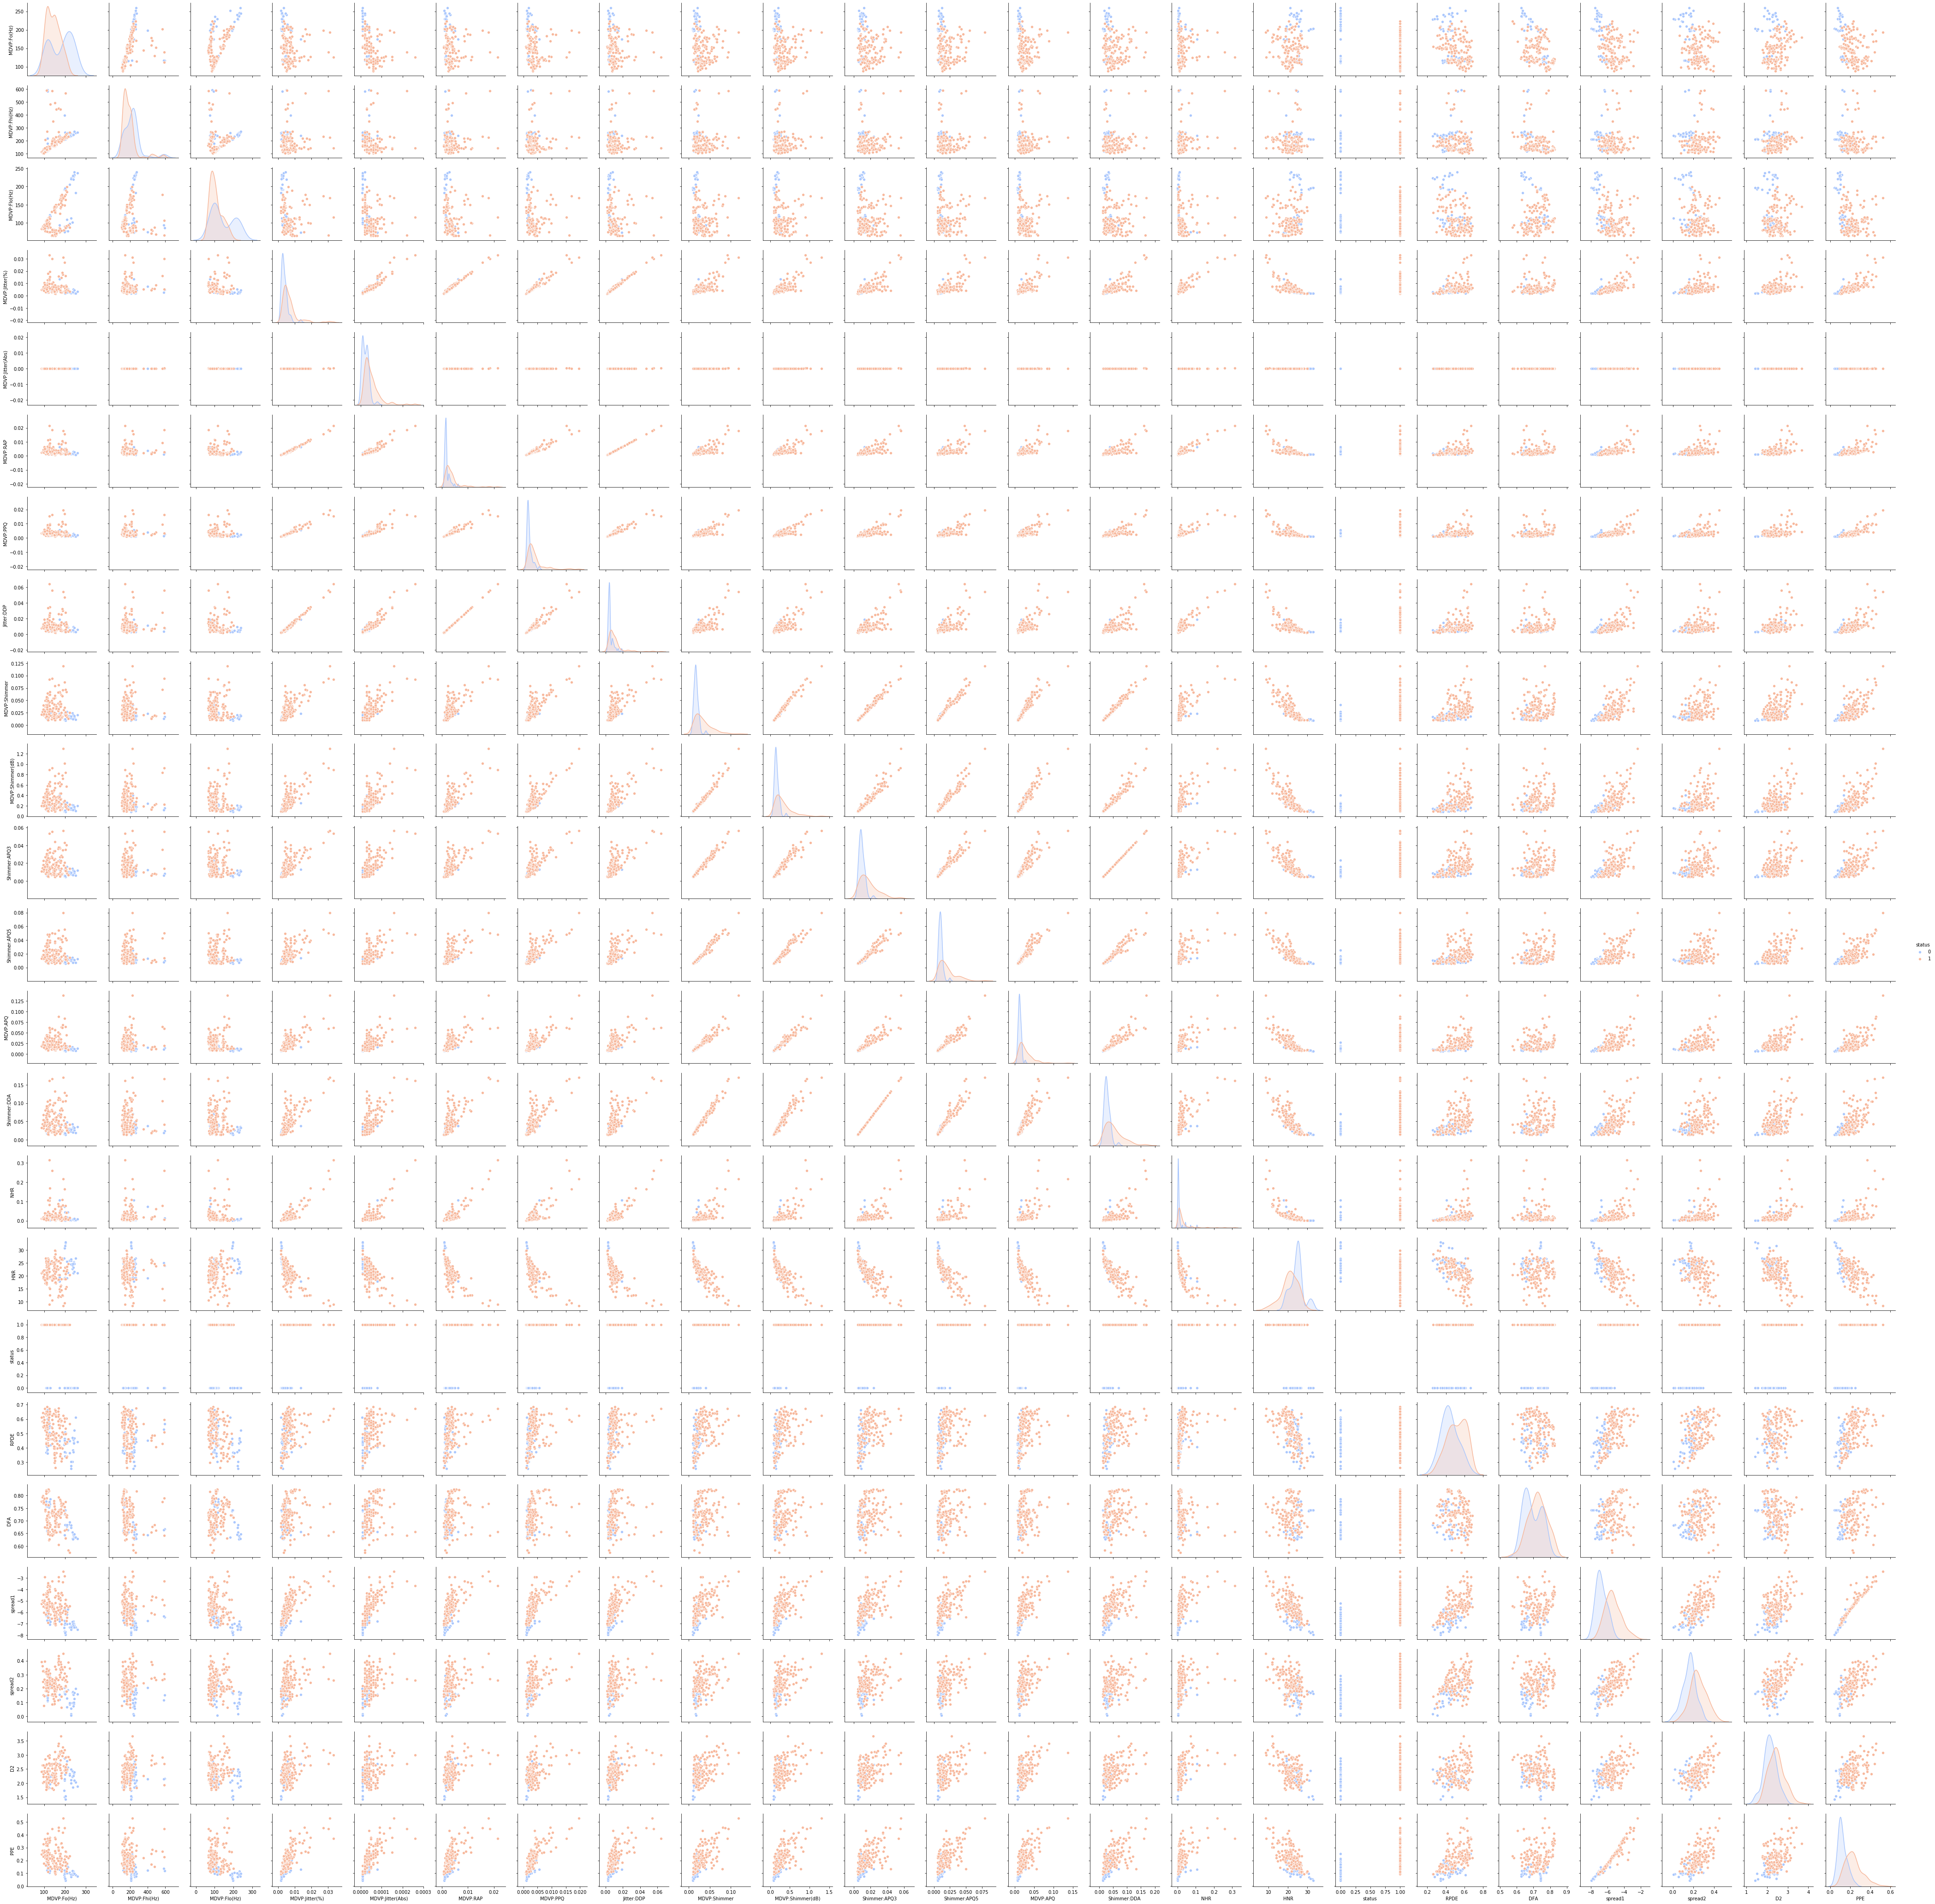

In [11]:
# Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables...
sns.pairplot(dataset,hue='status',palette='coolwarm')

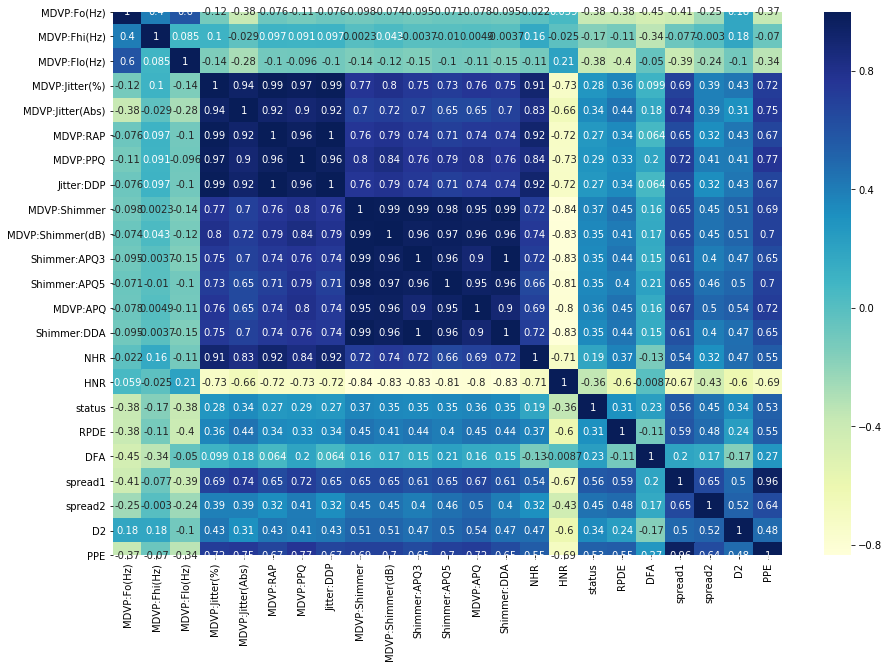

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,cmap="YlGnBu")

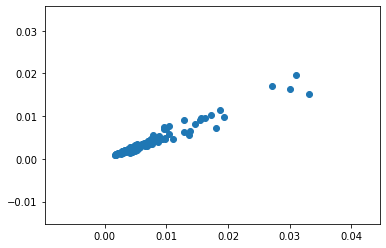

In [13]:
plt.scatter(data=dataset,x='MDVP:Jitter(%)',y="MDVP:PPQ")

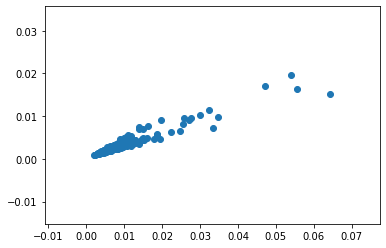

In [14]:
plt.scatter(data=dataset,x='Jitter:DDP',y="MDVP:PPQ")

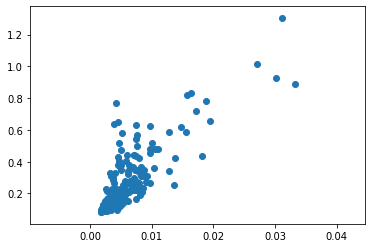

In [15]:
plt.scatter(data=dataset,x='MDVP:Jitter(%)',y='MDVP:Shimmer(dB)')

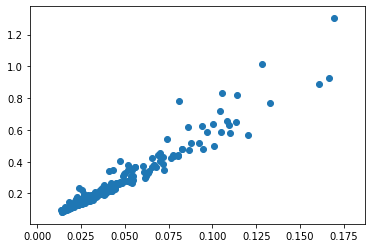

In [16]:
plt.scatter(data=dataset,x='Shimmer:DDA',y='MDVP:Shimmer(dB)')

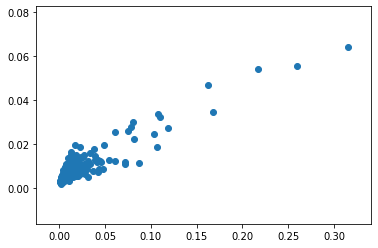

In [17]:
plt.scatter(data=dataset,x='NHR',y='Jitter:DDP')

In [18]:
correlation_values=dataset.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

# Problem:
**Here we are facing Multicollinearity**
- Multicollinearity generally occurs when there are high correlations between two or more feature variables. In other words, one predictor variable can be used to predict the other. So We need to remove some feature varaibles...
- I am eleminating some feature variables by using RFE(Calculated seperately)

In [19]:
X=dataset.drop(["status",'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'RPDE', 'DFA',
       'spread2'],axis=1)
y=dataset["status"]

In [20]:
X.head()

,MDVP:Fo(Hz),MDVP:Shimmer,Shimmer:APQ3,HNR,spread1,D2,PPE
0,119.992,0.04374,0.02182,21.033,-4.813031,2.301442,0.284654
1,122.400,0.06134,0.03134,19.085,-4.075192,2.486855,0.368674
2,116.682,0.05233,0.02757,20.651,-4.443179,2.342259,0.332634
3,116.676,0.05492,0.02924,20.644,-4.117501,2.405554,0.368975
4,116.014,0.06425,0.03490,19.649,-3.747787,2.332180,0.410335


# Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
X_test.head()

,MDVP:Fo(Hz),MDVP:Shimmer,Shimmer:APQ3,HNR,spread1,D2,PPE
39,187.733,0.01663,0.00829,26.310,-6.006647,2.382544,0.160691
163,112.150,0.01756,0.00967,21.219,-5.617124,1.871871,0.212386
61,223.365,0.01906,0.01013,26.138,-7.293801,2.321560,0.098555
32,198.383,0.01263,0.00640,30.775,-7.067931,1.512275,0.096320
123,182.018,0.02503,0.01372,18.784,-5.445140,2.174306,0.215558


In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(136, 7)
(136,)
(59, 7)
(59,)


# Scalling the Data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Creating and Training the Model

In [26]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Predictions

In [27]:
predictions=model.predict(X_test)

# Creating pickle

In [28]:
import pickle

In [29]:
pickle.dump(scaler,open("model1.pkl","wb"))

In [30]:
pickle.dump(model,open("model.pkl","wb"))

# Residual Analysis

Text(0.5, 0, 'Errors')

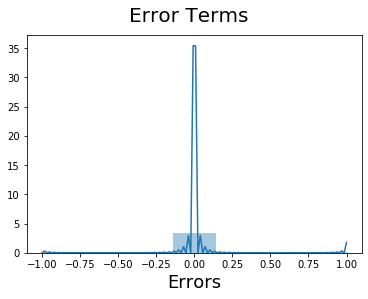

In [31]:
fig = plt.figure()
sns.distplot((y_test - predictions),)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)

**Errors are normally distributed**

# Evaluating the model

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
print("classification report:")
print(classification_report(y_test,predictions))
print("\n")
print("accuracy score:")
print(accuracy_score(y_test,predictions))
print("\n")
print("confusion matrix:")
print(confusion_matrix(y_test,predictions))

classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.98      0.98      0.98        43

    accuracy                           0.97        59
   macro avg       0.96      0.96      0.96        59
weighted avg       0.97      0.97      0.97        59



accuracy score:
0.9661016949152542


confusion matrix:
[[15  1]
 [ 1 42]]


## Visualising both Actual, Predicted Values

In [34]:
compare_df= pd.DataFrame()
compare_df["Actual"]=np.array(y_test)
compare_df["Predicted"]=np.array(predictions)

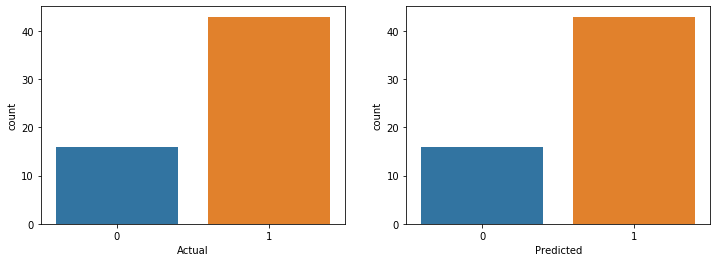

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(compare_df["Actual"], data =compare_df)
plt.subplot(1,2,2)
sns.countplot(compare_df["Predicted"], data = compare_df)

**Both looks almost similar** 